In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

data = pd.read_excel('mpjpe_results.xlsx')

print(data.head().to_string())
df = pd.DataFrame(data)

                                            nombre_imagen image_size  cantidad_true_keypoints  true_keypoints_visible  cantidad_pred_keypoints  pred_keypoints_visible  mpjpe_pixels     mpjpe
0  imagen_001_jpg.rf.2a634f01a533e3e1518c478c8d4dde0f.jpg    144x256                       17                      17                       17                      17      6.053486  0.020610
1  imagen_002_jpg.rf.39766b197a04d8d1569b3e546fd07390.jpg    144x256                       17                      12                       17                      12      5.004507  0.017038
2  imagen_003_jpg.rf.212077a70b1de84df04262b03db57f65.jpg    147x256                       17                      11                       17                      11      4.332703  0.014677
3  imagen_004_jpg.rf.4989fa64a1816f9648b130cd037da4c0.jpg    145x256                       17                      17                       17                      17      4.968954  0.016889
4  imagen_005_jpg.rf.6fa127bc74f8ab541befa56d

In [2]:
mpjpe_stats =df['mpjpe_pixels'].describe()
print(mpjpe_stats.to_string())

count    69.000000
mean      7.329259
std      12.486398
min       2.883423
25%       4.141049
50%       4.968954
75%       5.950775
max      98.694008


In [3]:
mpjpe =df['mpjpe'].describe()
print(mpjpe.to_string())

count    69.000000
mean      0.024934
std       0.042576
min       0.009784
25%       0.014051
50%       0.016889
75%       0.020260
max       0.336573


# Diagrama de caja

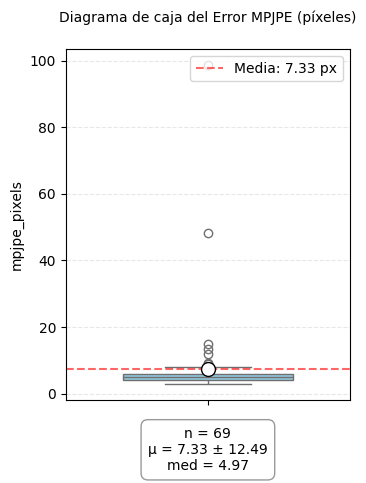

In [4]:
plt.figure(figsize=(3.7, 5))  # Tamaño ampliado

plt.rcParams.update({
    'font.size': 10,          # Tamaño de fuente base
    'axes.titlesize': 10,     # Tamaño de fuente para títulos
    'axes.labelsize': 10,     # Tamaño de fuente para etiquetas de ejes
    'xtick.labelsize': 10,    # Tamaño de fuente para etiquetas del eje x
    'ytick.labelsize': 10     # Tamaño de fuente para etiquetas del eje y
})

# Boxplot vertical para MPJPE
sns.boxplot(
    data=df,
    y='mpjpe_pixels',  # Eje Y para orientación vertical
    showmeans=True,  # Mostrar media
    meanprops={
        'marker': 'o',
        'markerfacecolor': 'white',
        'markeredgecolor': 'black',
        'markersize': 10
    },
    color='skyblue',  # Color único (usamos color en vez de palette para un solo grupo)
    width=0.6  # Ajustar ancho de la caja
)

# Personalización del gráfico
plt.title('Diagrama de caja del Error MPJPE (píxeles)', pad=20)
# plt.ylabel('Error en píxeles', fontsize=14)
plt.xlabel('')  # Eliminar etiqueta del eje X (no aplicable)
plt.grid(axis='y', linestyle='--', alpha=0.3)

# Anotaciones de estadísticas (usando mpjpe_stats previamente calculado)
plt.text(
    0.5,  # Posición X centrada (0.5 = centro)
    -0.2,  # Posición Y (negativa para colocarlo debajo)
    f"n = {int(mpjpe_stats['count'])}\nμ = {mpjpe_stats['mean']:.2f} ± {mpjpe_stats['std']:.2f}\nmed = {mpjpe_stats['50%']:.2f}",
    ha='center',
    fontsize=10,
    transform=plt.gca().transAxes,  # Corregido: usando plt.gca()
    bbox=dict(facecolor='white', alpha=0.8, edgecolor='gray', boxstyle='round,pad=0.5')
)

# Línea de referencia (opcional: error promedio)
plt.axhline(
    y=mpjpe_stats['mean'],
    color='red',
    linestyle='--',
    alpha=0.6,
    label=f'Media: {mpjpe_stats["mean"]:.2f} px'
)
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()

# Histograma

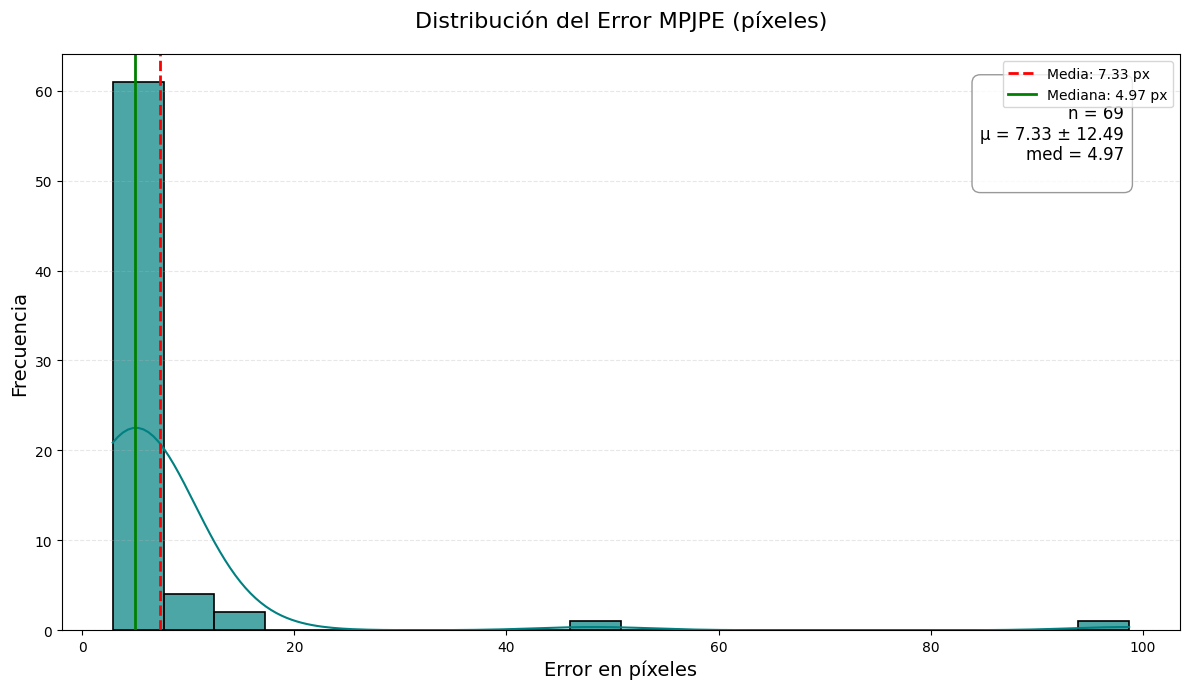

In [5]:
plt.figure(figsize=(12, 7))  # Tamaño ampliado para mejor legibilidad

# Histograma con KDE
hist = sns.histplot(
    data=df,
    x='mpjpe_pixels',
    bins=20,
    kde=True,
    color='teal',
    edgecolor='black',
    alpha=0.7,
    linewidth=1.2
)

# Líneas de media y mediana
plt.axvline(
    x=mpjpe_stats['mean'], 
    color='red', 
    linestyle='--', 
    linewidth=2,
    label=f'Media: {mpjpe_stats["mean"]:.2f} px'
)
plt.axvline(
    x=mpjpe_stats['50%'], 
    color='green', 
    linestyle='-', 
    linewidth=2,
    label=f'Mediana: {mpjpe_stats["50%"]:.2f} px'
)

# Personalización del gráfico
plt.title('Distribución del Error MPJPE (píxeles)', fontsize=16, pad=20)
plt.xlabel('Error en píxeles', fontsize=14)
plt.ylabel('Frecuencia', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.3)

# Leyenda con estadísticas clave
stats_text = f"""
n = {int(mpjpe_stats['count'])}
μ = {mpjpe_stats['mean']:.2f} ± {mpjpe_stats['std']:.2f}
med = {mpjpe_stats['50%']:.2f}
"""
plt.text(
    0.95, 0.95,  # Posición (x,y) en coordenadas relativas (0 a 1)
    stats_text,
    transform=plt.gca().transAxes,
    ha='right',
    va='top',
    fontsize=12,
    bbox=dict(facecolor='white', alpha=0.8, edgecolor='gray', boxstyle='round,pad=0.5')
)

plt.legend(loc='upper right')
plt.tight_layout()
plt.show()